# Assignment #0 - Data and Visualization

<font color="red"> <b> Due: Jan 29 (Tuesday) 11:00 pm </b> </font>


<font color="blue"> Abdullah-Al-Raihan Nayeem </font>

# I. Overview

In this assignment, we are starting with the basic usage of python based utility tools and libraries. This exercise would definitely become handy when we will implement machine learning modeling later. To do so, two databases are selected according to the instruction. One for the regression and another is for the classification. Data set are searched from kaggle and google database search and selected based on the informative features, number of samples and how it fits in the respective modeling. Reviewing linear algebra and probability theory are also part of this assignment to gather the basic knowledge to start with. 

# II. Linear Algebra and Probability Theory

Reading Chapter 2 and 3 in Deep Learning by Ian Goodfellow and others, summarize it for your own review.

## A. Linear Algebra
Linear algebra is a branch of mathematics used widely in computer science in engineering. It is more of a continous form of mathematics rather than discrete. Linear algebra includes several types of mathematical objects. These are scalars, vectors, matrices, tensors. All these objects are used to operate the calculation and represent the result. 

- Scalars: Scalar is just a number. In linear algebra which is defined by lower case variables and what kind of number it is. For example, in $s \in \mathbb{R}$, $s$ is a real valued scalar and in $s \in \mathbb{N}$, $s$ is a natural number scalar.

- Vectors: Vectors consist of array of numbers. Numbers are stored there in order and each number inside can be accessed by the index 

- Matrices: Matrices are 2D array of numbers. Each cells are addressed by a coordiante (which means two indices) rather than one in vectors. For example, in a matrix A, A[1][1] denotes the cell in second second row, second column. 

- Tensors: There are cases where an array needs more than 2D to present the state. In those cases, tensors are being used. Each group of indices in tensors contains another array of numbers. 

Using those above objects different operations are executed. 

- Transpose: Transpose of a matrix means the mirror image of a matrix accross a diagonal line which is called the main diagonal. 

- Identity matrix: This is such a matrix which does not change value of matrix when multiplying with that. The structure of an identity matrix is very simple. All the entries along the main diagonal are 1 and all other are zero.

- Inverse Matrix: Inverse of a matrix simple denotes as $A^-1$ for matrix $A$. A very important point to be noted here multiplying a matrix with its inverse matrix results an identity matrix with same dimension. If we denote identity matrix as $I$ then $A * A^-1 = I$

## B. Probability Theory
Probability theory is another branch of mathematics which is concerned with the analysis and predicted outcome from random events. There are several pillars that the probability theory works based upon.

- Sample Space: sample space contains all the possible outcomes from the random events.
- Random Experiment: This is a physical situation whose outcome cannot be predicted until it is observed. 
- Random variables: These are the possible outcomes from random experiments.
    - Discrete Random Variable: These are usually counts and contains discrete number of values.
    - Continuous Random Variable: Contains infinite number of possible values. These are usually measurements.
- Probability: The possibility of occuring an event with in some random experiments. For example, In the case of tossing a coin there are two possible outcomes (sample space) and both are equally probable. Conditional probability is the measurement where probability is calculated based on the occurrence of another event.
- Probability Distribution: This is a mathematical function that maps the all possible outcomes of an random experiment with it’s associated probability. It depends on the Random Variable X, whether it’s discrete or continues.

# III. Data

## A. Data for Regression
For regression analysis, black friday dataset from kaggle has been chosen. Based on the features it has, like age group of customers, hierarchical product category and amount spent, this dataset is a decent one to apply regression analysis to find purchase trend. Key attributes in this dataset and their details are given below:

- PRODUCT_ID: unique identifier for the products.
- Gender: Gender of the customers.
- Age: Age group of the customers.
- Occupation: occupation of the customers.
- City_Category: Purchase has been made from which city
- Stay_In_Current_City: For how long the customer has been in that city
- Marital_Status: Customer's marital status.
- Product_Category: 3 Level hierarchical product category
- Purchase: Amount of purchase

### Reading Data
The dataset has been read from a csv formatted file as pandas data frame.

In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('BlackFriday.csv')

### Preprocessing Data

In [5]:
age_group = df.groupby(["Gender", "Age"], as_index=True)
rdf = age_group['Purchase'].sum()

group_data = rdf.to_dict()
group_levels = rdf.index.levels
gender_groups = group_levels[0]
age_groups = group_levels[1]
chart_data = {g: [] for g in gender_groups}

for g1_index in range(len(gender_groups)):
    for g2_index in range(len(age_groups)):
        group_key = (gender_groups[g1_index], age_groups[g2_index])
        chart_data[gender_groups[g1_index]].append(group_data[group_key]/1000000)


### Visualizing the data

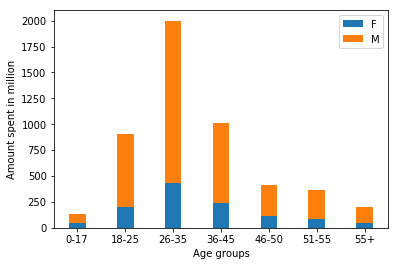

In [6]:
bar_count = len(age_groups)
index = np.arange(bar_count)
bar_width = 0.35

b1 = plt.bar(index, chart_data['F'], bar_width)
b2 = plt.bar(index, chart_data['M'], bar_width, bottom=chart_data['F'])
plt.ylabel('Amount spent in million')
plt.xlabel('Age groups')
plt.xticks(index, age_groups)
plt.legend((b1[0], b2[0]), gender_groups)
plt.show()

In the above stacked bar chart, we can see that, people in age group 26-35 make the most amount of purchase during black friday and mostly men. This insight can help seller to set focus product and take marketing technique accordingly.

### Preprocessing the data

In [7]:
city_group = df.groupby(['City_Category', 'Stay_In_Current_City_Years'])
rdf = city_group['Purchase'].sum()

group_data = rdf.to_dict()
group_levels = rdf.index.levels
city_groups = group_levels[0]
stay_in_current_city_groups = group_levels[1]
chart_data = {g: [] for g in city_groups}

for g1_index in range(len(city_groups)):
    for g2_index in range(len(stay_in_current_city_groups)):
        group_key = (city_groups[g1_index], stay_in_current_city_groups[g2_index])
        chart_data[city_groups[g1_index]].append(group_data[group_key]/1000000)

### Visualizing the data

In [8]:
y = chart_data['A']
x = stay_in_current_city_groups
city_a = plt.plot(x, y)

y = chart_data['B']
city_b = plt.plot(x, y)

y = chart_data['C']
city_c = plt.plot(x, y)

plt.grid(True)
plt.xlabel('Stay In Current City Years')
plt.ylabel('Amount spent in million')
plt.legend((city_a[0], city_b[0], city_c[0]), city_groups)

This line charts shows that people who is living in a city for around 1 year tend to purhcase more than others. Here, we can imply that, at the first year people basically focus more on settling in and after 2-4 years people have most of the things they need. Given that, people living in a city for a year purhcase more that usual.

### Preprocessing the data

In [9]:
product_group = df.groupby('Product_Category_1')
rdf = product_group.sum()
sorted_rdf = rdf.sort_values(by='Purchase', ascending=False)['Purchase']

top_five = sorted_rdf.head(7)
remaining = rdf[rdf.index > 7]

product_categories_label = top_five.keys().tolist()
product_categories_label.append('Others')

### Visualizing the data

In [11]:
values = top_five.to_list()
values.append(remaining['Purchase'].sum())

labels = product_categories_label

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')
plt.show()

So far, we have figured out which age group purchase most during black friday. Additionally, we have also figured out at what living condition people go for the purchase most of the time. To find out more about the purchase trend, above visualization presents people of which occupation make the most purchase.

## B. Data for Classification
For data classification, crime data of Chicago has been chosen. Although the source has all the crime data from 2001 to present. In this assignment, only a subset of that data has been selected (crime data of 2018). This dataset seems a good one for classification. Different districts are going through different types of crime web and penalties. Analyzing these information can help find a way to identify the crime zones and the impact of time in a day.

In [358]:
df = pd.read_csv('CrimesChicago2018.csv')

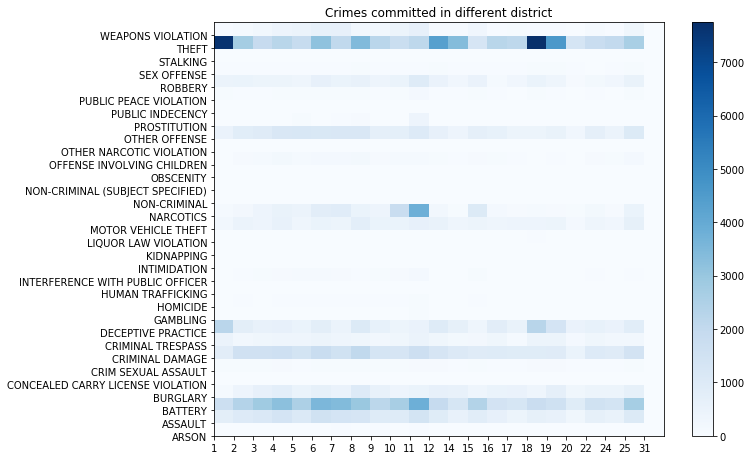

In [359]:
crime_group = df.groupby(['Primary Type', 'District'])
rdf = crime_group['Case Number'].count()

group_data = rdf.to_dict()
group_levels = rdf.index.levels
crime_type_groups = group_levels[0]
district_groups = group_levels[1]

chart_data = []
for g1_index in range(len(crime_type_groups)):
    ct_data = []
    for g2_index in range(len(district_groups)):
        group_key = (crime_type_groups[g1_index], district_groups[g2_index])
        ct_data.append(group_data.get(group_key, 0))
    chart_data.append(ct_data)

chart_data = np.array(chart_data)

fig, ax = plt.subplots()

heatmap = ax.pcolor(chart_data, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(district_groups)))
ax.set_yticks(np.arange(len(crime_type_groups)))

ax.set_xticklabels(district_groups)
ax.set_yticklabels(crime_type_groups)

fig.set_size_inches(11.03, 6.5)
ax.set_title("Crimes committed in different district")
fig.tight_layout()
plt.colorbar(heatmap)
plt.show()


The above chart shows, the type of crime committed in different district of chicago. On the chart, the type of crimes are plotted against the districts and it seems 'Theft' is the most common crime in all the districts. 

In [364]:
times = pd.DatetimeIndex(df.Date)
grp = df.groupby([times.hour])
rdf = grp['Arrest'].sum()

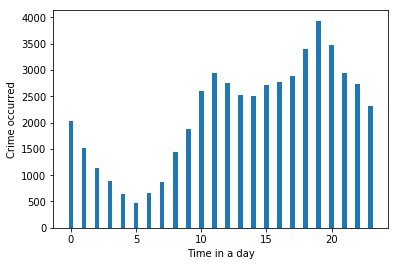

In [365]:
bar_count = len(grp.groups.keys())
crime_count = rdf.to_list()

index = np.arange(bar_count)
bar_width = 0.35

fig.set_size_inches(11.03, 6.5)
b1 = plt.bar(index, crime_count, bar_width)
plt.ylabel('Crime occurred')
plt.xlabel('Time in a day')
plt.show()

From this visualization, we would be able to know what time during a day is most likely to face crime. From the bar chart above, it can be said that criminals are mostly active during the night time. Specially, from 8PM to 10PM in the night.

# IV. Conclusions

Through this assignment, I have got more familiar with numpy, pandas, matplotlib. Finding different insights from the database helped to understand the potential of the data more precisely. Hope to apply machine learning algorithms on these datasets in near future.

# References

1. Crimes - 2018 | City of Chicago | Data Portal. (n.d.). Retrieved January 28, 2019, from https://data.cityofchicago.org/Public-Safety/Crimes-2018/3i3m-jwuy

2. Dagdoug, M. (2018, July 25). Black Friday. Retrieved January 28, 2019, from https://www.kaggle.com/mehdidag/black-friday
3. Goodfellow, I., Bengio, Y.,, Courville, A. (2016). Deep Learning. MIT Press. 